In [1]:
import numpy as np
from matplotlib.pylab import *

In [2]:
rho_m = 1.0
v_m = 1.0

def F(rho):
    return rho*v_m*(1-rho/rho_m)

L = 1.0
N = 125    # of grid points in space
Nt = 125  # of grid points in time
h = 0.005
a = L/(N-1)
coeff = h/(2*a)
print (coeff)

0.31


In [3]:
def traffic(rho,Nt,N,F):
    for n in range(Nt-1):
        for i in range(N):
            rho[i,n+1] = 0.5*(rho[(i+1)%N,n]+rho[(i-1)%N,n]) - coeff*(F(rho[(i+1)%N,n])-F(rho[(i-1)%N,n]))
    return rho

In [4]:
def congested(x, x0, p0, alpha, sigma):
    return p0*(1 + alpha * (np.exp(-(x-x0)**2/(2*sigma**2))))

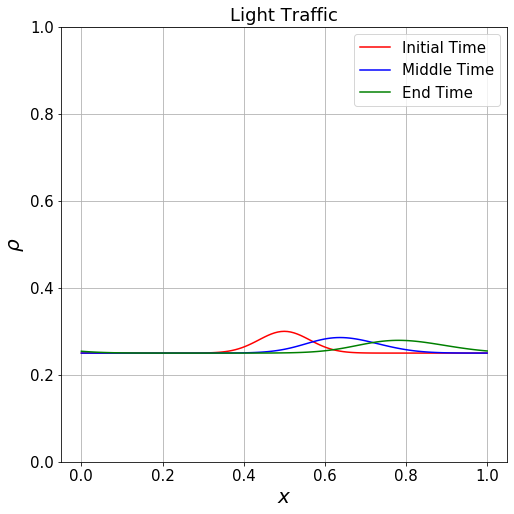

In [12]:
x = np.linspace(0,L,N)
rho = np.zeros((N,Nt))


rho[:,0] = congested(x, L/2, rho_m/4, 1/5, L/16)
rho = traffic(rho,Nt,N,F)

figure(figsize=(8,8)); 
title('Light Traffic')
plot(x, rho[:,0], label= 'Initial Time', color ='red')
plot(x, rho[:,Nt//2], label = 'Middle Time', color = 'blue')
plot(x, rho[:,Nt-1], label = 'End Time', color = 'green')
xlabel('$x$', fontsize=20)
ylabel('$\\rho$', fontsize=20)
ylim(0,1)
legend()
grid()
show()

#Traffic moves forward as shown below, at it reaches the other side at the very end since the boundaries are periodic,
#meaning that the traffic lane is connected back to the front like a race track

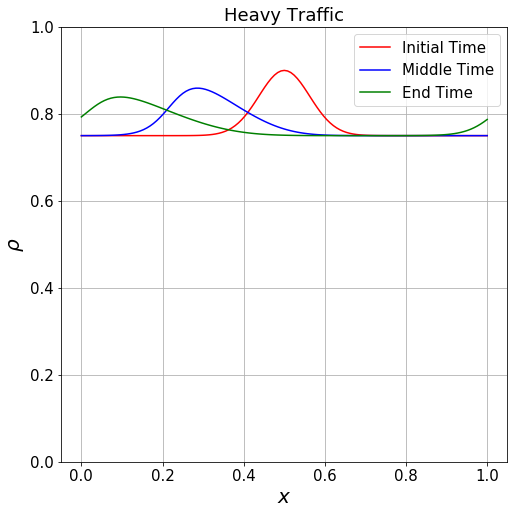

In [11]:
rho2 = np.zeros((N,Nt))

rho2[:,0] = congested(x, L/2, 3*rho_m/4, 1/5, L/16)
rho2 = traffic(rho2,Nt,N,F)

figure(figsize=(8,8));
title('Heavy Traffic')
plot(x, rho2[:,0], label= 'Initial Time', color ='red')
plot(x, rho2[:,Nt//2], label = 'Middle Time', color = 'blue')
plot(x, rho2[:,Nt-1], label = 'End Time', color = 'green')
xlabel('$x$', fontsize=20)
ylabel('$\\rho$', fontsize=20)
ylim(0,1)
legend()
grid()
show()

#The traffic is not physically moving backwards but rather it is stalling, as the cars further back need to slow down
# and stop, the cars ahead are able to move and essentially the bulk/peak of the traffic moves further back as that is
#where the cars are gathering up while the cars in front are slowly able to continuing moving forward
#The green part at the end is simply due to the fact that we are using periodic boundaries like a closed race track

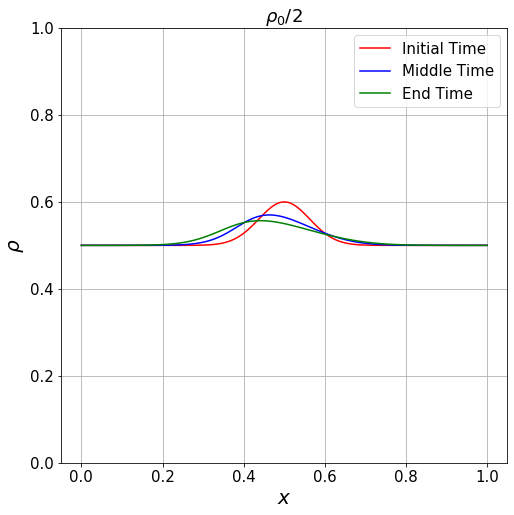

In [9]:
rho3 = np.zeros((N,Nt))

rho3[:,0] = congested(x, L/2, rho_m/2, 1/5, L/16)
rho3 = traffic(rho3,Nt,N,F)

figure(figsize=(8,8));
title('$\\rho_0 /2 $')
plot(x, rho3[:,0], label= 'Initial Time', color ='red')
plot(x, rho3[:,Nt//2], label = 'Middle Time', color = 'blue')
plot(x, rho3[:,Nt-1], label = 'End Time', color = 'green')
xlabel('$x$', fontsize=20)
ylabel('$\\rho$', fontsize=20)
ylim(0,1)
legend()
grid()
show()

#Slight distortion, mainly drifting to the left side

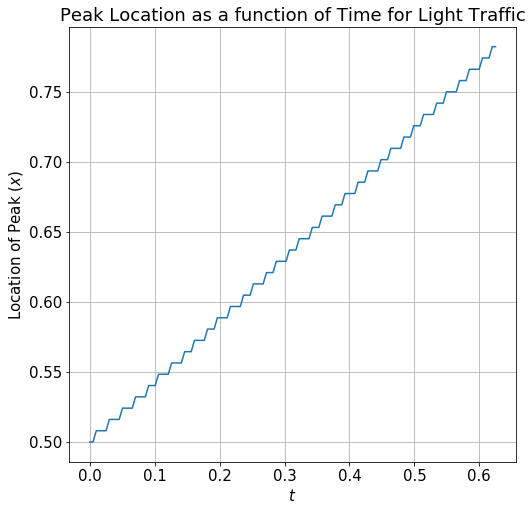

In [10]:
t = np.linspace(0,Nt*h,Nt)

PeakLoc= argmax(rho, axis=0) * a

figure(figsize=(8,8));
plot(t, PeakLoc)

title('Peak Location as a function of Time for Light Traffic')
xlabel('$t$')
ylabel('Location of Peak $(x)$')
rcParams.update({'font.size': 15})
grid()
show()

#With a higher Nt/Nx the graph should smooth out to represent a linear relationship 